<a href="https://colab.research.google.com/github/WoradeeKongthong/association_rule_learning/blob/master/02_Bakery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association Rule Learning

Association rule learning of which products were bought together from a bakery.  
data source : https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/WoradeeKongthong/association_rule_learning/master/BreadBasket_DMS.csv')

In [3]:
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [27]:
df['DateTime'] = pd.to_datetime(df['Date']+' '+df['Time'])
df.drop(['Date','Time'], axis=1, inplace=True)
df

,Transaction,Item,DateTime
0,1,Bread,2016-10-30 09:58:11
1,2,Scandinavian,2016-10-30 10:05:34
2,2,Scandinavian,2016-10-30 10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57
4,3,Jam,2016-10-30 10:07:57
...,...,...,...
21288,9682,Coffee,2017-04-09 14:32:58
21289,9682,Tea,2017-04-09 14:32:58
21290,9683,Coffee,2017-04-09 14:57:06
21291,9683,Pastry,2017-04-09 14:57:06


# EDA

In [6]:
print('The record begins : ',df['DateTime'].min().date(),'\nUntil : ',df['DateTime'].max().date())

The record begins :  2016-10-30 
Until :  2017-04-09


In [7]:
# number of transactions
print('Number of transaction : ',df['Transaction'].nunique())
print('Minimum number : ', df['Transaction'].min())
print('Maximum number : ', df['Transaction'].max())

Number of transaction :  9531
Minimum number :  1
Maximum number :  9684


Note : some transactions are cancelled

In [8]:
print('Number of unique items : ', df['Item'].nunique())
print(df['Item'].unique())

Number of unique items :  95
['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'R

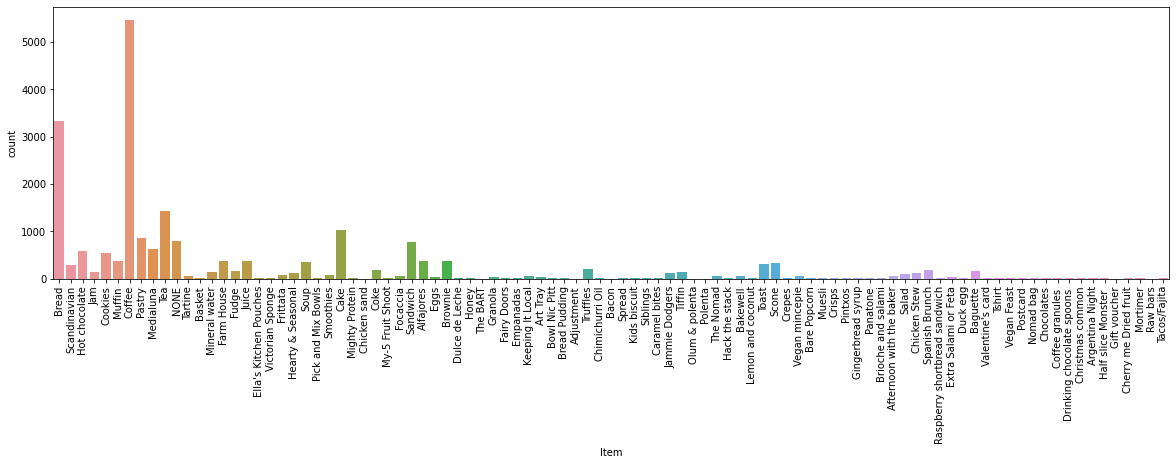

In [28]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='Item')
plt.xticks(rotation=90)
plt.show()

Note : most frequent ordered items are coffee and bread

In [11]:
df1 = df.copy()
df1['hour'] = df1['DateTime'].dt.hour
df1

,Transaction,Item,DateTime,hour
0,1,Bread,2016-10-30 09:58:11,9
1,2,Scandinavian,2016-10-30 10:05:34,10
2,2,Scandinavian,2016-10-30 10:05:34,10
3,3,Hot chocolate,2016-10-30 10:07:57,10
4,3,Jam,2016-10-30 10:07:57,10
...,...,...,...,...
21288,9682,Coffee,2017-04-09 14:32:58,14
21289,9682,Tea,2017-04-09 14:32:58,14
21290,9683,Coffee,2017-04-09 14:57:06,14
21291,9683,Pastry,2017-04-09 14:57:06,14


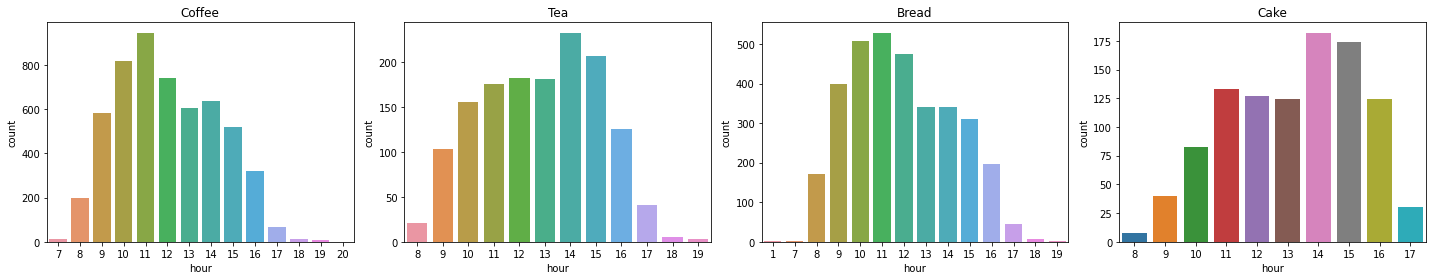

In [12]:
fig = plt.figure(figsize=(20,4))
items = ['Coffee','Tea','Bread','Cake']
index = 0

for item in items :
  fig.add_subplot(1,4,index+1)
  sns.countplot(data=df1[df1['Item']==item], x='hour')
  plt.title(item)
  index+=1

fig.tight_layout()
plt.show()

Note :  
Coffee is most frequently purchased around 11 am.  
Tea is most frequently purchased around 2 pm.  
Bread is most frequently purchased during lunch.  
Cake is most frequently purchased from 2 pm.

# Data Preprocessor

I'll drop the records that Item = NONE

In [0]:
transaction_number = [df['Transaction'].min()]
basket = []
purchase_list = []

for i in range(len(df)):

  transaction = df.loc[i,'Transaction']
  item = df.loc[i,'Item']

  if transaction in transaction_number:
    # not include the 'NONE' item
    if item != 'NONE':
      # put the item to the basket
      basket.append(item)

  else:
    # add transaction number in to the list
    transaction_number.append(transaction)
    # put the former basket to the purchase_list
    purchase_list.append(basket)
    # empty the basket for the next transaction items
    basket = []
    # put the item to the basket
    if item != 'NONE':
      basket.append(item)

purchase_list.append(basket)

In [48]:
len(purchase_list)

9531

In [49]:
purchase_list[:10]

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

In [50]:
purchase_list[-5:]

[['Bread'],
 ['Truffles', 'Tea', 'Spanish Brunch', 'Christmas common'],
 ['Muffin', 'Tacos/Fajita', 'Coffee', 'Tea'],
 ['Coffee', 'Pastry'],
 ['Smoothies']]

# Priori model

In [51]:
! pip install apyori

In [0]:
from apyori import apriori

In [0]:
rules = apriori(purchase_list, min_support=0.015, min_confidence=0.05, min_lift=1, min_length=2)

Note :  
- the data is 5 months record
- we will consider the item that is bought at least once a day, or 7x4x5 = 140 times in 5 month  
    min_support = 140/9531 = 0.015
- let's set the minimum confidence to be 0.05, it means that at least 5% of transactions that contain item A will contain item B as well.
- let min_lift = 1, it means that the likelihood of item A & B are bought together is at least 1 times more than that only item B is bought.

# Result

In [0]:
result = list(rules)

In [56]:
len(result)

24

Create result dataframe

In [0]:
result_list = []
for i in range(len(result)):
  rule = list(result[i].items)
  if len(rule) > 1:
    support = result[i].support
    confidence = result[i].ordered_statistics[0][2]
    lift = result[i].ordered_statistics[0][3]

    row = (rule,support,confidence,lift)
    result_list.append(row)

labels = ['rule','support','confidence','lift']
result_df = pd.DataFrame(result_list, columns=labels)

In [59]:
result_df.sort_values('lift', ascending=False)

,rule,support,confidence,lift
5,"[Cake, Tea]",0.023607,0.228891,1.615972
14,"[Toast, Coffee]",0.023502,0.704403,1.482699
9,"[Medialuna, Coffee]",0.034939,0.073542,1.198175
11,"[Pastry, Coffee]",0.047214,0.099382,1.162216
0,"[Alfajores, Coffee]",0.019515,0.540698,1.138116
8,"[Juice, Coffee]",0.020460,0.534247,1.124537
12,"[Sandwich, Coffee]",0.037981,0.079947,1.120551
13,"[Scone, Coffee]",0.017941,0.522936,1.100729
6,"[Cookies, Coffee]",0.028014,0.058966,1.091280
7,"[Hot chocolate, Coffee]",0.029378,0.061837,1.067704


Note :  
Let's discuss the first rule :  Cake & Tea    

*   (support = 0.024) 2.4% of the transactions in 5 months contain Cake.
*   (confidence = 0.229) 22.9 % of the customers that buy Cake, also buy Tea.
*   (lift = 1.62) the likelihood of buying Cake and Tea together is 1.62 times more than the likelihood of buying just Tea.  

The second rule :  Toast & Coffee  

*   (support = 0.024) 2.4% of the transactions in 5 months contain Toast.
*   (confidence = 0.704) 70.4 % of the customers that buy Toast, also buy Coffee. (This is the highest confidence, it's the most popular combination)
*   (lift = 1.48) the likelihood of buying Toast and Coffee together is 1.48 times more than the likelihood of buying just Coffee.  

rule :  Coffee & Bread    

*   (support = 0.089 and confidence = 0.089) It's because the model's Item_base is empty set [] and add (Coffee,Bread) combination to calculate confidence. So the likelihood that customer buy Coffee and Bread combination is 8.9% of all transactions.
*   (lift = 1) the model found out that Coffee and Bread have no association. 

rule :  Cake & Coffee    

*   (support = 0.054 and confidence = 0.054) It's because the model's Item_base is empty set [] and add (Cake,Coffee) combination to calculate confidence. So the likelihood that customer buy Cake and Coffee combination is 5.4% of all transactions.
*   (lift = 1) the model found out that Cake and Coffee have no association. 

In [63]:
result[10]

RelationRecord(items=frozenset({'Coffee', 'Bread'}), support=0.08939250865596475, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Coffee', 'Bread'}), confidence=0.08939250865596475, lift=1.0)])